In [1]:
from clipppy import load_config
from matplotlib import pyplot as plt
import torch, pyro, numpy as np 
import collections, os
from ruamel.yaml import YAML

import sys
sys.path.append('/home/eliasd/lensing/elias_utils')
from plotting import *
from channels import split_channels

config = load_config('config_gen_mock_lens_source.yaml')

model = config.umodel
guide = config.guide 

PARAMS = YAML().load(open('params.yaml'))['lens_source']

# print(model().shape)
# print(model())

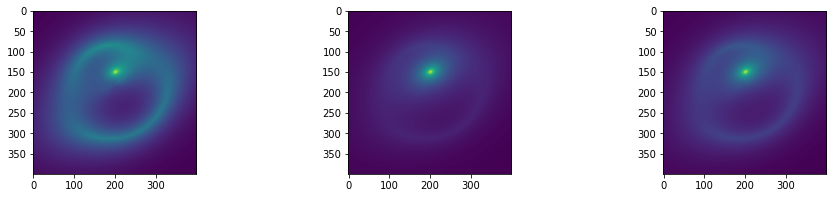

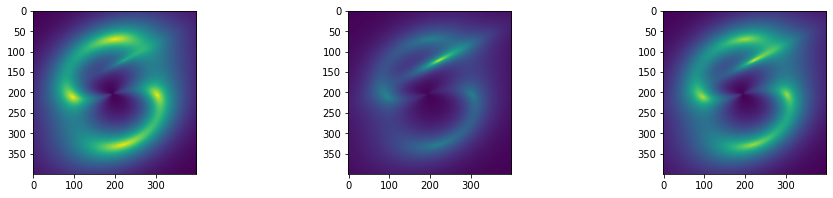

In [2]:
if model.n_channels >= 2:
    plot_imshow(split_channels(model()), size_y = 3)
    plot_imshow(split_channels(model()), size_y = 3)
if model.n_channels == 1:
    plot_imshow([model(), model()], size_y = 3)

In [3]:
with pyro.poutine.trace() as tracer, pyro.condition(data=PARAMS['truth']):
    OBS = model()
OBSTRACE = tracer.trace

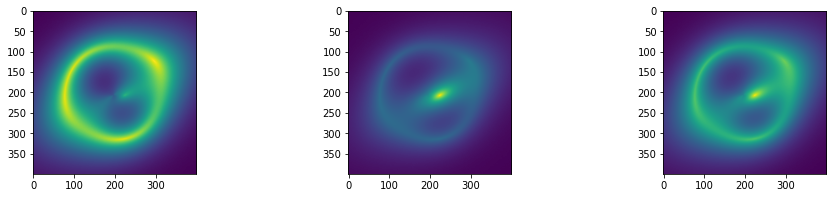

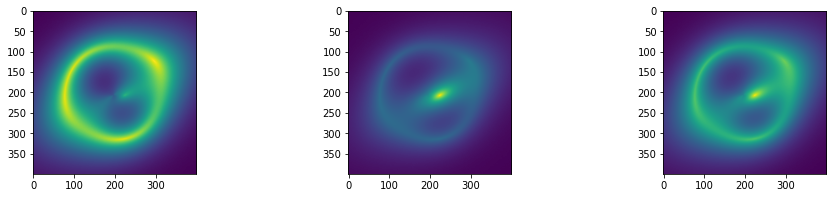

In [4]:
if model.n_channels >= 2:
    plot_imshow(split_channels(OBS), size_y = 3)
    plot_imshow(split_channels(OBS), size_y = 3)
if model.n_channels == 1:
    plot_imshow([OBS, OBS], size_y = 3)

In [5]:
keys = OBSTRACE.nodes.keys()
for k in keys: print(k, '\t', OBSTRACE.nodes[k]['fn'], '\t', OBSTRACE.nodes[k]['value'] )

ext/gamma_1 	 Normal(loc: 0.0, scale: 0.05000000074505806) 	 0.007
ext/gamma_2 	 Normal(loc: 0.0, scale: 0.05000000074505806) 	 0.01
main/phi 	 ExpandedDistribution() 	 1.0
main/q 	 Uniform(low: 0.10000000149011612, high: 1.0) 	 0.75
main/r_ein 	 Uniform(low: 1.0, high: 1.7000000476837158) 	 1.5
main/x 	 Uniform(low: -0.20000000298023224, high: 0.20000000298023224) 	 -0.05
main/y 	 Uniform(low: -0.20000000298023224, high: 0.20000000298023224) 	 0.1
sersic2/x 	 Uniform(low: -1.0, high: 1.0) 	 0.3
sersic2/y 	 Uniform(low: -1.0, high: 1.0) 	 0.1
sersic2/q 	 Uniform(low: 0.10000000149011612, high: 1.0) 	 0.5
sersic2/index 	 Uniform(low: 0.5, high: 2.0) 	 1.1
sersic2/r_e 	 Uniform(low: 0.5, high: 2.0) 	 0.9
sersic2/I_e 	 Uniform(low: 0.5, high: 2.0) 	 1.1
Xsrc 	 MaskedDistribution() 	 tensor([[-1.5134, -1.5037, -1.4940,  ...,  1.4551,  1.4656,  1.4761],
        [-1.5106, -1.5008, -1.4911,  ...,  1.4526,  1.4631,  1.4737],
        [-1.5077, -1.4980, -1.4882,  ...,  1.4501,  1.4607,  1.4712],

In [6]:
torch.save(OBS, 'gen_source_lens_source.pt')